<a href="https://colab.research.google.com/github/seenu-g/gen-AI/blob/main/experiments/audio_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U transformers
!pip install datasets[audio] librosa transformers
!pip install transformers[sentencepiece]
!pip install datasets
!pip install transformers[torch]
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
from datasets import Audio
import librosa


In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")
minds = load_dataset("PolyAI/minds14", "fr-FR")


No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
example = minds["train"][0]
asr(example["audio"]["array"])

{'text': 'SUCH A LOONE'}

In [ ]:
example["english_transcription"]


'I want to change my address'

In [ ]:
from datasets import load_dataset
from datasets import Audio

minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
example = minds[0]
example["transcription"]

'ich möchte gerne Geld auf mein Konto einzahlen'

In [ ]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="maxidl/wav2vec2-large-xlsr-german")
asr(example["audio"]["array"])

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


{'text': 'ich möchte gerne geld auf mein konto einzallen'}

In [ ]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small")

In [ ]:
text = "Ladybugs have had important roles in culture and religion, being associated with luck, love, fertility and prophecy. "
output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"])

In [ ]:
fr_text = "Contrairement à une idée répandue, le nombre de points sur les élytres d'une coccinelle ne correspond pas à son âge, ni en nombre d'années, ni en nombre de mois. "
output = pipe(fr_text)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
song = "♪ In the jungle, the mighty jungle, the ladybug was seen. ♪ "
output = pipe(song)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
music_pipe = pipeline("text-to-audio", model="facebook/musicgen-small")
#  For music generation, we’ll define a text-to-audio pipeline

In [ ]:
text = "90s rock song with electric guitar and heavy drums"

forward_params = {"max_new_tokens": 512}
output = music_pipe(text, forward_params=forward_params)

Audio(output["audio"][0], rate=output["sampling_rate"])

https://huggingface.co/learn/audio-course/chapter2/hands_on

In [ ]:
# Load the dataset in streaming mode

from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", name="en", streaming=True)

In [ ]:
# Take the first three examples from the training part

ds_head = ds['train'].take(3)

In [ ]:
# Get the third example and explore it

example = list(ds_head)[-1]
example

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

In [ ]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

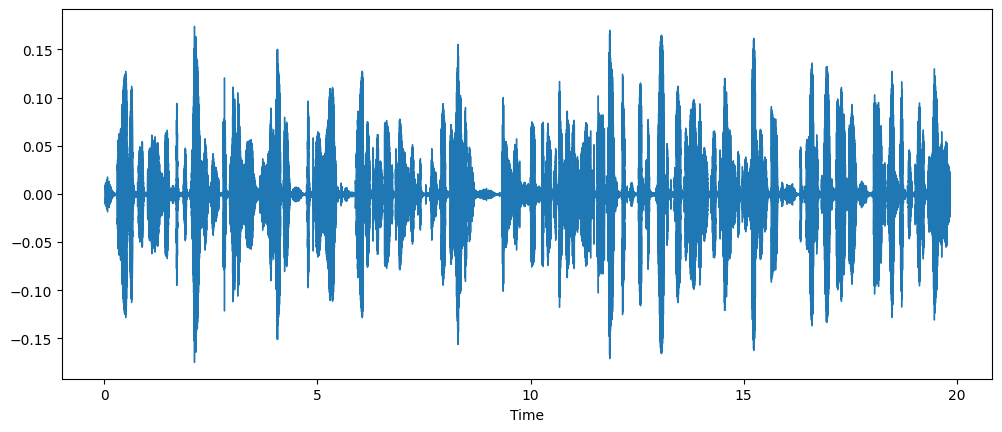

In [ ]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

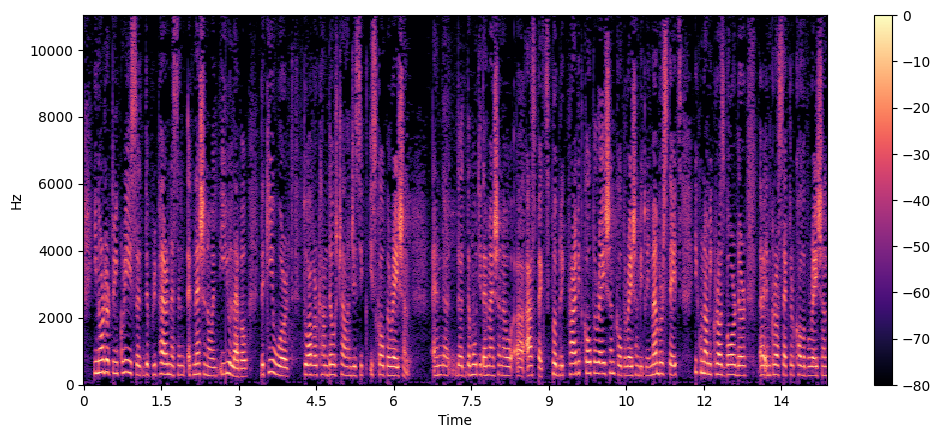

In [ ]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()